DECISION TREE USING TENNIS.CSV

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('tennis.csv')

In [ ]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [ ]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [ ]:
df_encoded = df
columns_to_encode = ['outlook', 'temp', 'humidity','windy']
le = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [ ]:
X = df_encoded.drop('play', axis=1)
y = df_encoded['play']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(X_train, y_train)
print("Performance without pruning:", data_model.score(X_test, y_test))
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 1.0
At depth: 4


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
y_pred = data_unpruned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 100.0


In [ ]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [0, 2]])

<function matplotlib.pyplot.show(close=None, block=None)>

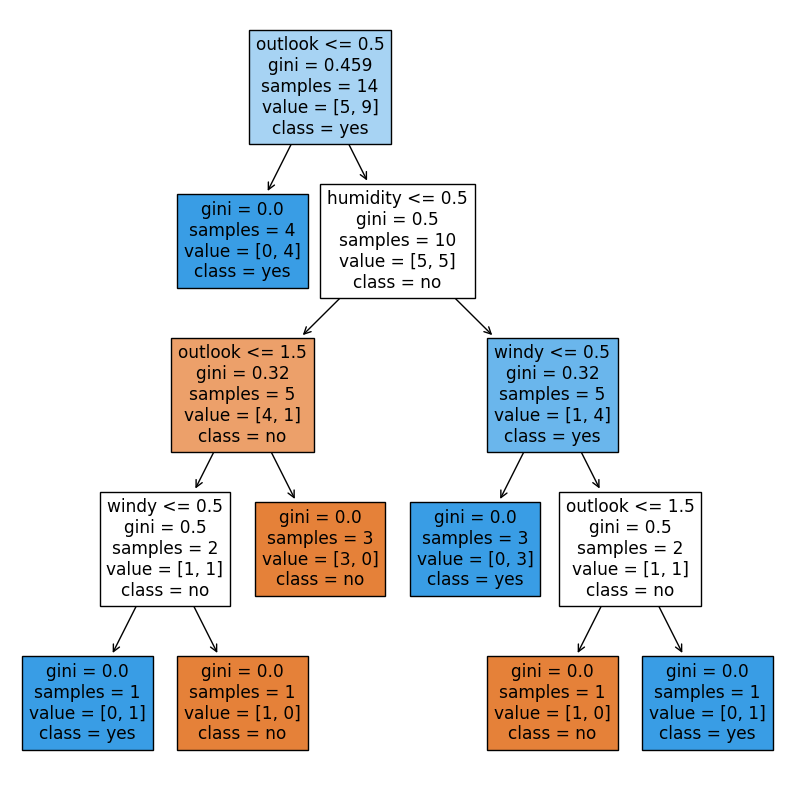

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True, ax=ax)

plt.show

-----------END-----------------------

DECISION TREE USING THE BOSTON HOUSING DATA SET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
mean=(df[['CRIM','ZN','CHAS', 'INDUS','AGE','LSTAT']].mean())

In [ ]:
columns=df[['CRIM','ZN','CHAS','INDUS','AGE','LSTAT']]

In [ ]:
df[['CRIM','ZN','CHAS','INDUS','AGE','LSTAT']] = df[['CRIM','ZN','CHAS','INDUS','AGE','LSTAT']].fillna(mean)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=6)

In [ ]:
DT=regressor.fit(X_train, Y_train)
DT

DecisionTreeRegressor(max_depth=6)

In [ ]:
DT.score(X_train,Y_train)

0.9473550516257327

In [ ]:
DT.score(X_test,Y_test)

0.6489615449641845

In [ ]:
y_pred=DT.predict(X_test)
y_pred

array([24.93166667, 24.93166667, 20.77021277, 13.25238095, 20.77021277,
       20.81764706, 20.77021277, 20.81764706, 20.77021277, 20.77021277,
        9.61111111, 17.55      , 13.25238095,  6.58333333, 48.5       ,
       33.65555556, 20.77021277, 34.78888889, 24.93166667, 20.81764706,
       24.93166667, 20.77021277, 20.77021277, 24.93166667, 20.77021277,
       20.77021277, 20.77021277, 16.59583333, 40.75      , 19.8375    ,
       13.25238095, 13.25238095, 20.77021277, 20.77021277, 24.93166667,
       16.59583333,  9.61111111, 24.575     , 16.59583333, 17.55      ,
       20.81764706, 20.77021277, 24.93166667, 13.25238095, 24.93166667,
       24.93166667, 18.95      , 16.59583333, 15.168     , 24.93166667,
       16.59583333, 19.8375    , 20.77021277, 35.2       , 16.59583333,
       23.525     , 20.77021277, 20.77021277, 12.2       , 20.15555556,
       20.81764706, 20.77021277, 33.65555556, 33.75      , 13.25238095,
       33.75      , 16.59583333, 20.15555556, 50.        , 20.77

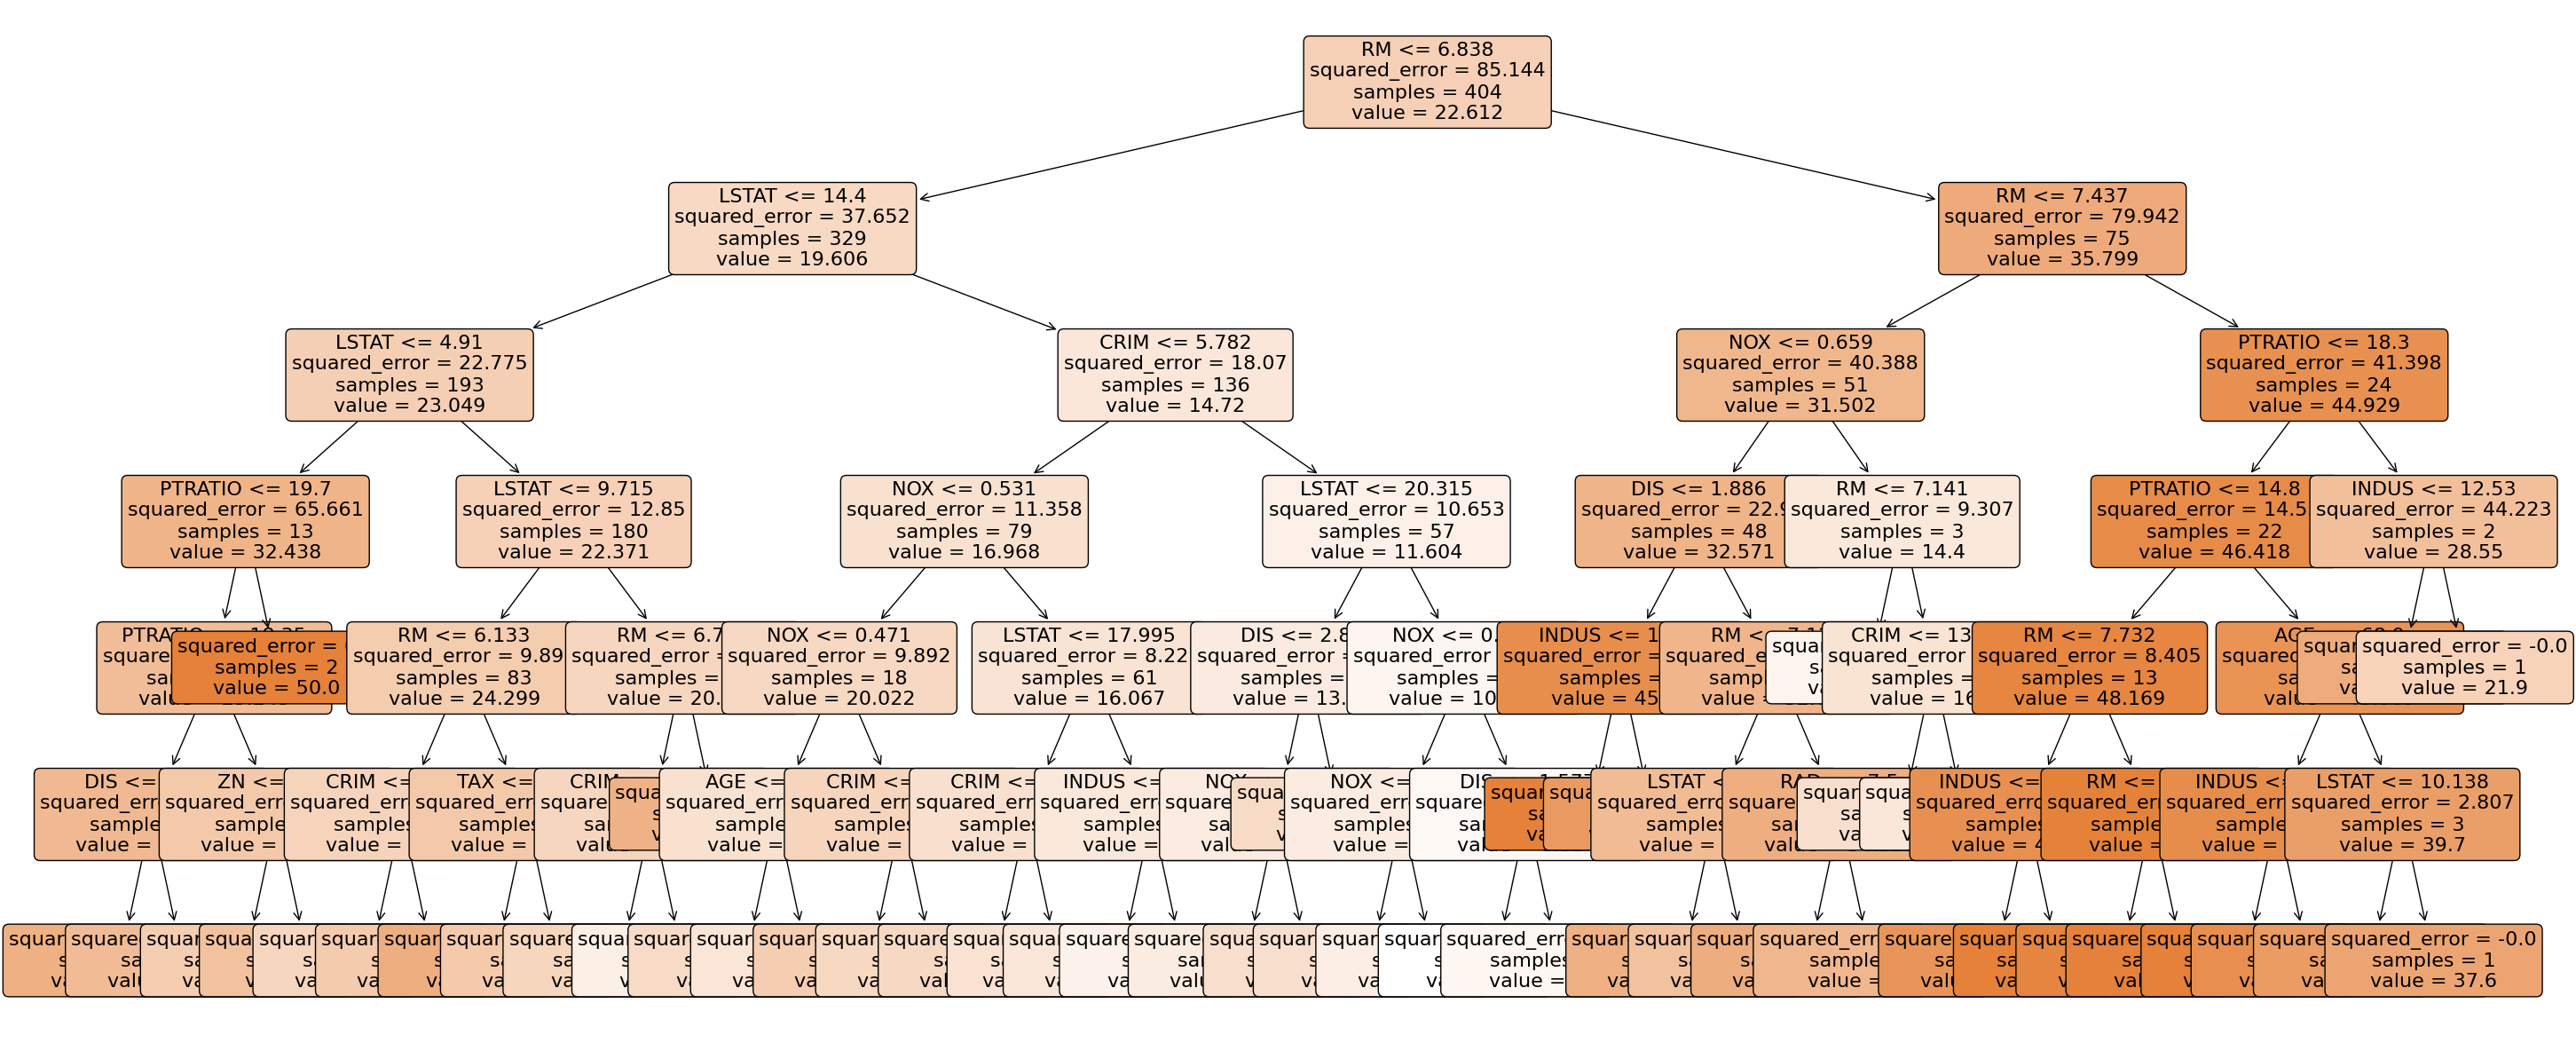

In [ ]:
plt.figure(figsize=(35,15))
a = plot_tree(regressor,
              feature_names=X.columns,
              class_names=y,
              filled=True,
              rounded=True,
              fontsize=16,
              )

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 28.584513444267174
R-squared (R2) Score: 0.6489615449641845


-----------------------END---------------------------

DECISION TREE USING THE IRIS DATASET

Name:Stefani Jeyaseelan Reg No: 21BAI1809

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [ ]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

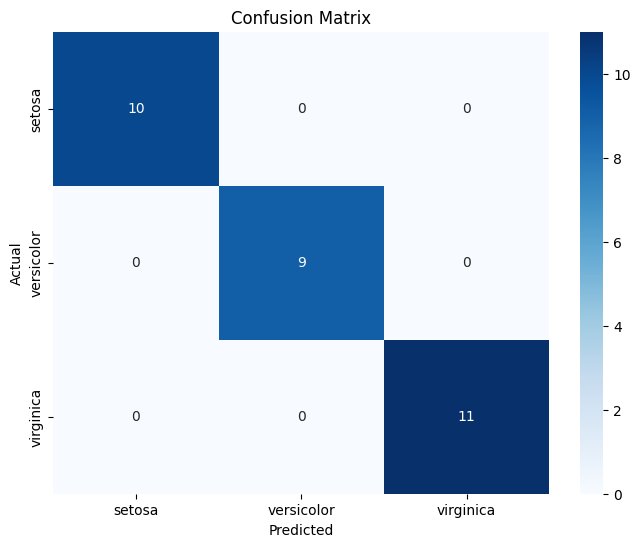

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

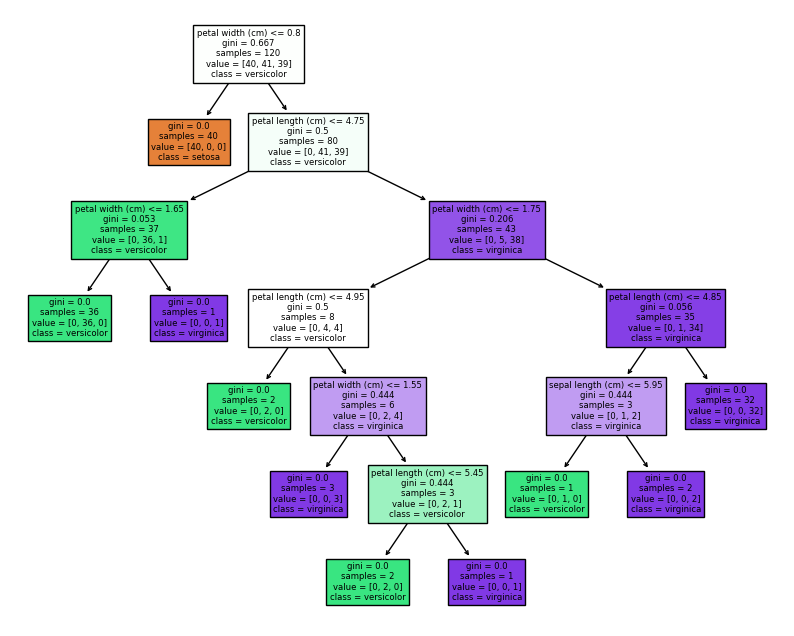

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()